In [1]:
pip install welford

Note: you may need to restart the kernel to use updated packages.


In [2]:
grafic=[]  ######## posizionati in un blocco a parte per permettere la realizzazione del grafico di confronto
oldconf=[0.0 for j in range(5)]
meanPrior_dv=[0.0,0.0,0.0]
meanPrior_app=[0.0,0.0,0.0]
meanNoPrior=[0.0,0.0,0.0]




for 14.000000 delivery piority jobs the service node statistics are:

  avg interarrivals .. = 1136.9507199
  avg wait ........... = 117.8980943
  avg # in node ...... = 0.1036967
  avg delay .......... = 5.7902886
  avg # in queue ..... = 0.0050928
  avg service time.....= 112.1076310

for 50.000000 application piority jobs the service node statistics are:

  avg interarrivals .. = 318.3462016
  avg wait ........... = 117.9680405
  avg # in node ...... = 0.3705653
  avg delay .......... = 7.1024516
  avg # in queue ..... = 0.0223105
  avg service time.....= 110.8496262

for 276.000000 no priority jobs the service node statistics are:

  avg interarrivals .. = 57.6714133
  avg wait ........... = 118.9363846
  avg # in node ...... = 2.0623109
  avg delay .......... = 6.2527021
  avg # in queue ..... = 0.1084194
  avg service time.....= 111.8735198
processing batch  1

for 14.000000 delivery piority jobs the service node statistics are:

  avg interarrivals .. = 2140.4523840
  avg wait 

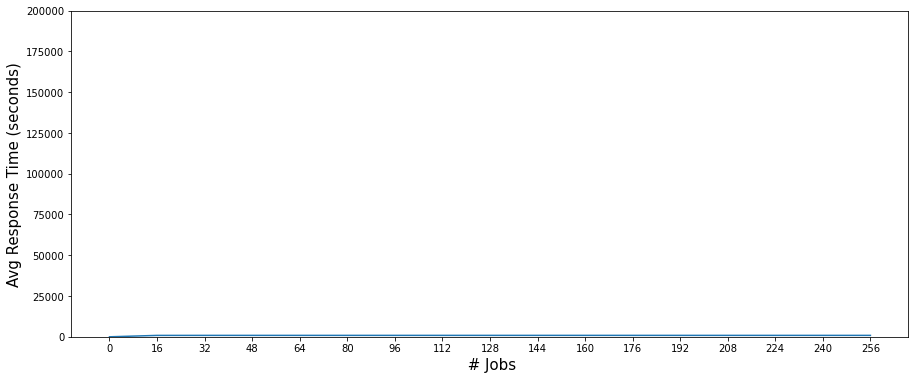

<Figure size 432x288 with 0 Axes>

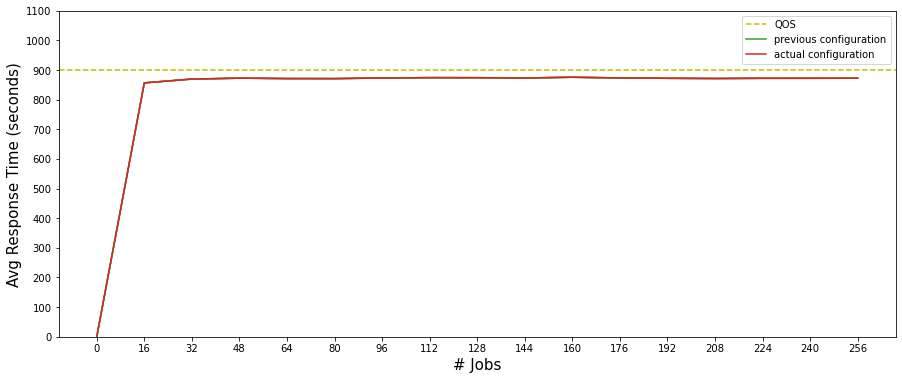

<Figure size 432x288 with 0 Axes>

for old configuration lambda is Mid  and centers are 1 3 11 2
for new configuration lambda is Mid  and centers are 1 3 11 2

the actual node statistics are:

      node     mean response time    std response time      w response time     utilizzation

       1          73.1769754             8.5543542            2.2284726          0.5565361
       2         120.7318601            10.9878051            2.8624046          0.6029045
       3         669.0661733            25.8663135            6.7383663          0.8448142
       4        1298.2297808            36.0309559            9.3863310          0.3885789


the system statistics are:

   mean response time   std response time     w response time      income

       872.0489589           29.5304751           7.6929076       2071.7318922 $
[5.59043774 7.22507525 8.66490837]


In [21]:
 # PRINTARE MEGLIO I VALORI E GLI INTERVALLI DI CONFIDENZA
    
    
from ipynb.fs.full.rngs import plantSeeds, selectStream, random
from ipynb.fs.full.rvms import cdfNormal,idfNormal,idfStudent
from colorama import Fore, Style, Back
from math import log,exp,fabs, sqrt
from matplotlib import pyplot as plt
from welford import Welford
import numpy as np

#seed = 123456798
#seed = 365676778
seed = 222222223


#centers = [0,1,1,4,1]
centers = [0,1,3,11,2]
#centers = [0,4,10,47,13]

NODES=4
TINY = 1.0e-10
SQRT2PI = 2.506628274631  # #/* sqrt(2 * pi) */
PRICE=10
SUPP_DV=2
SUPP_APP=1
SCREEN=16

CASS=1
KITCHEN=2
TABLE=3
DELIVERY=4

MAXIMUM=95600000.0


LAMBDA1LOW=0.0036603
LAMBDA1MID=0.0122984
LAMBDA1HIGH=0.0512456

LAMBDA2LOW=0.000208
LAMBDA2MID=0.000667
LAMBDA2HIGH=0.008271

LAMBDA3LOW=0.0004067
LAMBDA3MID=0.0030746
LAMBDA3HIGH=0.0219624

NUM1LOW=0.8560665
NUM1MID=0.766760
NUM1HIGH=0.6289318

NUM2LOW=0.048815
NUM2MID=0.041550
NUM2HIGH=0.101526

NUM3LOW=0.0951185
NUM3MID=0.191690
NUM3HIGH=0.2695422

CASS=1
KITCHEN=2
TABLE=3
DELIVERY=4


n1=LAMBDA1MID
n2=LAMBDA2MID
n3=LAMBDA3MID

b = 256
k = 64
index_total= 0
q=1
flag=0
route=0
conteggio=0
arriveControl=[0.0,0.0,0.0]
uscita=0

timer = [0.0 for i in range(NODES+1)]


#MAXIMUM=10000000

START =   0.0                    # initial (open the door)        */
#STOP  =   75600.0                # secondi delle 21 ore del mcDonald */
arrivalTemp = [START for x in range(NODES+1)]
delivery=[]
deliv=0
total_val=[]
num=[]
w=[]
meanResponseTime=[]
aw=[]
bw=[]
cw=[]
dw=[]
ew=[]
fw=[]
gw=[]
newconf=[0.0 for j in range(5)]
string1=[]
string2=[]
b_array=[]

class TypeNode:
    id= None 
    ev= None 
    servers=0.0 
    index=None  
    sum=0.0 
    number= 0.0
    area=0.0 
    flow=None 
    lamb=0.0  
    lambda3=0.0
    p=None
    
    
    def __init__(self, id_node):
        self.id = id_node
        self.ev = Event()
        self.index = AccumSum()
        self.flow= Time()
        self.p = Priority()
        

class Event:
    t = 0.0 #next event time
    x =None  #event status, 0 or 1
    last= 0.0
    dv = 0

class Time:
    current = None          # current time                       */
    next = None             # next (most imminent) event time    */

class AccumSum:
                          # accumulated sums of                */
    service =0.0          #   service times                    */
    served = 0.0           #   number served                    */
    total= 0.0
    service_dv =0.0
    served_dv = 0
    service_app =0.0
    served_app = 0

class Data:
    
    node=None
    event=None
    verify=0
    
class Priority:
    prior = 0
    number_dv = 0
    area_dv = 0
    next_dv =0.0
    current_dv = 0.0
    queue_dv = 0
    sum_dv = 0
    number_app = 0
    area_app = 0
    next_app =0.0
    current_app = 0.0
    queue_app = 0
    sum_app = 0
    

for j in range(SCREEN):
    w.append(Welford())

    
welfprior=Welford()    
    
######funzioni per il grafico #########################################


def plot_stats_global():

    x = [i*SCREEN for i in range(SCREEN+1)]
    y = [meanResponseTime[i] for i in range(SCREEN+1)]
    idx=[0,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256]
    plt.figure(figsize=(15,6))
    plt.plot(x,y)
    plt.xticks(idx)
    plt.ylabel(ylabel="Avg Response Time (seconds)", fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlabel(xlabel=" # Jobs", fontsize=15)   
    plt.ylim(0, 200000)
    plt.figure()


    plt.show()
    
    
def plot_stats_global_comp():

    x = [i*SCREEN for i in range(SCREEN+1)]
    y = [grafic[i] for i in range(SCREEN+1)]
    z = [meanResponseTime[i] for i in range(SCREEN+1)]
    
    idy=[0,100,200,300,400,500, 600, 700, 800,900, 1000,1100]
    idx=[0,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256]
    plt.figure(figsize=(15,6))
    plt.plot(x,y)
    plt.plot(x,z)
    plt.ylabel(ylabel="Avg Response Time (seconds)", fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlabel(xlabel="# Jobs", fontsize=15)
    plt.axhline(y=900, color='y', linestyle='--', label='QOS')
    plt.yticks(idy)
    plt.xticks(idx)
    plt.plot(x, y, label='previous configuration')
    plt.plot(x, z, label='actual configuration')
    plt.legend(loc='upper right')
    plt.ylim(0, 1100)
    plt.figure()

    plt.show()  
    
#####funzioni per i print ####################à
def PriorityPrint(node, current_for_update):
    
    average2=0

    print("\nfor {0:1f} delivery piority jobs the service node statistics are:\n".format(node.p.sum_dv))
    print("  avg interarrivals .. = {0:6.7f}".format(current_for_update /node.p.sum_dv))
    print("  avg wait ........... = {0:6.7f}".format(node.p.area_dv /node.p.sum_dv))
    print("  avg # in node ...... = {0:6.7f}".format(node.p.area_dv / current_for_update))

    for s in range(1,node.servers+1):            # adjust area to calculate */ 
            node.p.area_dv -= node.index[s].service_dv  # averages for the queue   */
            if node.p.area_dv <0:
                node.p.area_dv=0
            if node.index[s].served_dv!=0:
                average2 += node.index[s].service_dv / node.index[s].served_dv 

    print("  avg delay .......... = {0:6.7f}".format(node.p.area_dv /node.p.sum_dv))
    print("  avg # in queue ..... = {0:6.7f}".format(node.p.area_dv /  current_for_update))
    print("  avg service time.....= {0:6.7f}".format(average2/node.servers)) 

def Priority2Print(node, current_for_update):
    
    average2=0

    print("\nfor {0:1f} application piority jobs the service node statistics are:\n".format(node.p.sum_app))
    print("  avg interarrivals .. = {0:6.7f}".format(current_for_update /node.p.sum_app))
    print("  avg wait ........... = {0:6.7f}".format(node.p.area_app /node.p.sum_app))
    print("  avg # in node ...... = {0:6.7f}".format(node.p.area_app / current_for_update))

    for s in range(1,node.servers+1):            # adjust area to calculate */ 
            node.p.area_app -= node.index[s].service_app  # averages for the queue   */
            if node.p.area_app <0:
                node.p.area_app=0
            if node.index[s].served_app!=0:
                average2 += node.index[s].service_app / node.index[s].served_app 

    print("  avg delay .......... = {0:6.7f}".format(node.p.area_app /node.p.sum_app))
    print("  avg # in queue ..... = {0:6.7f}".format(node.p.area_app /  current_for_update))
    print("  avg service time.....= {0:6.7f}".format(average2/node.servers))
    
    
def Priority3Print(node, current_for_update):
    
    average2=0

    print("\nfor {0:1f} no priority jobs the service node statistics are:\n".format(node.sum))
    print("  avg interarrivals .. = {0:6.7f}".format(current_for_update /node.sum))
    print("  avg wait ........... = {0:6.7f}".format(node.area /node.sum))
    print("  avg # in node ...... = {0:6.7f}".format(node.area / current_for_update))

    for s in range(1,node.servers+1):            # adjust area to calculate */ 
            node.area -= node.index[s].service  # averages for the queue   */
            if node.area <0:
                node.area=0
            if node.index[s].served!=0:
                average2 += node.index[s].service / node.index[s].served 

    print("  avg delay .......... = {0:6.7f}".format(node.area /node.sum))
    print("  avg # in queue ..... = {0:6.7f}".format(node.area /  current_for_update))
    print("  avg service time.....= {0:6.7f}".format(average2/node.servers)) 
        
    
##funzioni per la coda prioritaria

def PriorityArea(node, n, e):
    if node.p.number_dv == 0 and n==2 and arriveControl[2]==0:
        node.p.current_dv = node.p.next_dv    
    node.p.area_dv += ( node.p.next_dv - node.p.current_dv)*node.p.number_dv

    node.p.current_dv = node.p.next_dv 

def Priority2Area(node, n, e):
    if node.p.number_app == 0 and n==2 and arriveControl[2]==1:
        node.p.current_app = node.p.next_app    
    node.p.area_app += ( node.p.next_app - node.p.current_app)*node.p.number_app

    node.p.current_app = node.p.next_app     

    
    
def Exponential(m):
# ---------------------------------------------------
# * generate an Exponential random variate, use m > 0.0 
# * ---------------------------------------------------
# */
  return (-m * log(1.0 - random()))


def Normal(m, s):
    # ========================================================================
    # Returns a normal (Gaussian) distributed real number.
    # NOTE: use s > 0.0
    #
    # Uses a very accurate approximation of the normal idf due to Odeh & Evans,
    # J. Applied Statistics, 1974, vol 23, pp 96-97.
    # ========================================================================
    #
    p0 = 0.322232431088
    q0 = 0.099348462606
    p1 = 1.0
    q1 = 0.588581570495
    p2 = 0.342242088547
    q2 = 0.531103462366
    p3 = 0.204231210245e-1
    q3 = 0.103537752850
    p4 = 0.453642210148e-4
    q4 = 0.385607006340e-2

    u = random()
    if (u < 0.5):
        t = sqrt(-2.0 * log(u))
    else:
        t = sqrt(-2.0 * log(1.0 - u))

    p = p0 + t * (p1 + t * (p2 + t * (p3 + t * p4)))
    q = q0 + t * (q1 + t * (q2 + t * (q3 + t * q4)))

    if (u < 0.5):
        z = (p / q) - t
    else:
        z = t - (p / q)

    return (m + s * z)



def TruncatedNormal(m, s, a, b):
    # ---------------------------------------------------
# * generate a Truncated Normal random variate, use m,s,a,b > 0.0,
# * ---------------------------------------------------
# */
    alpha = cdfNormal(m, s, a)
    beta = 1.0 - cdfNormal(m, s, b)
    u = Uniform(alpha, 1.0 - beta)
    return idfNormal(m, s, u)

def Uniform(a,b):  
# --------------------------------------------
# * generate a Uniform random variate, use a < b 
# * --------------------------------------------
# */
  return (a + (b - a) * random())  


def GetArrival(m, node,route):
# ----------------------------------------------------
# * generate the next arrival time, with rate variable
# * --------------------------------------------------
# */ 
    global arrivalTemp
    
    if node==1:
        selectStream(0)
        arrivalTemp[0] += Exponential(1/m)
        return (arrivalTemp[0])
    elif node==2 and route ==0:
        selectStream(1)
        arrivalTemp[1] += Exponential(1/m)
        return (arrivalTemp[1])
    elif node==2 and route ==1:
        selectStream(6)
        arrivalTemp[2] += Exponential(1/m)
        return (arrivalTemp[2])
    
def GetService(i):
# --------------------------------------------
# * generate the next service time with rate 1/6
# * --------------------------------------------
# */ 
      
    if i == CASS:
        selectStream(2)
        return (TruncatedNormal(45,4,10,80))
    elif i == KITCHEN:
        selectStream(3)
        return (TruncatedNormal(112,5,60,164))
    elif i == TABLE:
        selectStream(4)
        return (TruncatedNormal(600,20,200,1600))
    elif i == DELIVERY:
        selectStream(5)
        return (TruncatedNormal(1200,40,800,2000))
        


def CalcolateIncome():
    expence=0
    for i in range(1,NODES+1):
        expence+=(nodes[i].flow.current-timer[i])*nodes[i].servers*nodes[i].price
    return b*PRICE+nodes[2].p.sum_dv*SUPP_DV+ nodes[2].p.sum_app*SUPP_APP-(expence)

    
    
def choosePrice(i):
    
   
        
    if i == CASS:
        nodes[i].price=0.005421     
    
    if i == KITCHEN:
        nodes[i].price=0.0073655
        
    if i == TABLE:
        nodes[i].price=0.00062437          
        
    if i == DELIVERY:
        nodes[i].price=0.0003411
                
        
        
def NextNode(nodes):
# -------------------------------------
# * return the index of the next node 
# * -----------------------------------
# */
    time_events=[]
    
    data=Data()
    
    for i in range (1, len(nodes)):
        for s in range(nodes[i].servers + 1):
            time_events.append(nodes[i].ev[s].t)
        
    time_events = sorted(time_events, key=lambda x: (x == 0.0, x))
   
    for i in range(1, len(nodes)):
        for j in range(nodes[i].servers + 1):
            if time_events[0] == nodes[i].ev[j].t:
                data.node=i
                data.event=j
               
                return (data)
    
    
def lambdaFunc(nodes, i):
    
    
    if i == CASS:
        nodes[i].lamb=n1
            
    elif i == KITCHEN:
        nodes[i].lamb=n2
        nodes[i].lambda3=n3
            

def numFunc(lambda1):
    
    if lambda1==LAMBDA1LOW:
        num.append(NUM1LOW)
        num.append(NUM2LOW)
        num.append(NUM3LOW)
        
    if lambda1==LAMBDA1MID:
        num.append(NUM1MID)
        num.append(NUM2MID)
        num.append(NUM3MID)
    
    if lambda1==LAMBDA1HIGH:
        num.append(NUM1HIGH)
        num.append(NUM2HIGH)
        num.append(NUM3HIGH)
        
    return num



def FindOne(node):
# -----------------------------------------------------
# * return the index of the available server idle longest
# * -----------------------------------------------------
# */
    i = 1

    while (node.ev[i].x == 1):       # find the index of the first available */
        i += 1                        # (idle) server                         */
    #EndWhile
    s = i
    
    while (i < node.servers):         # now, check the others to find which   */ 
        i += 1                        # has been idle longest                 */
        if ((node.ev[i].x == 0) and (node.ev[i].last <= node.ev[s].last)):
            s = i
   #EndWhile 
    return (s)



def forwardFunc(node,e):
    
    global flag
        
    if node==CASS:
        
        forwardNode(CASS,KITCHEN)    
                
    if node==KITCHEN:
           
        if nodes[node].ev[e].dv==1:

            forwardNode(KITCHEN,DELIVERY)
            nodes[node].p.number_dv-=1
            nodes[node].p.sum_dv+=1
        else:
            if nodes[node].ev[e].dv==2:
                nodes[node].p.number_app-=1
                nodes[node].p.sum_app+=1
            forwardNode(KITCHEN,TABLE)
            
        
    
        if flag==1:
            nodes[node].ev[e].dv=1 
            flag=0
        if flag==2:
            nodes[node].ev[e].dv=2
            flag=0
                
    if node==TABLE or node==DELIVERY:
       
        nodes[0].number -= 1
        nodes[0].sum +=1
        wellFordFunc()
        

        
def forwardNode(startNode,forwardNode):
        nodes[forwardNode].flow.next    = nodes[startNode].ev[e].last
        nodes[forwardNode].area     += ( nodes[forwardNode].flow.next - nodes[forwardNode].flow.current) * nodes[forwardNode].number  # update integral  */
        nodes[forwardNode].flow.current = nodes[forwardNode].flow.next 
        nodes[forwardNode].number += 1
        nodes[startNode].ev[e].dv=0
        if (nodes[forwardNode].number <= nodes[forwardNode].servers):
            service  = GetService(forwardNode)
            s = FindOne(nodes[forwardNode])
            nodes[forwardNode].index[s].service += service
            nodes[forwardNode].index[s].served += 1                                          ############

            nodes[forwardNode].ev[s].t      =  nodes[startNode].flow.current + service
            nodes[forwardNode].ev[s].x      = 1
        #EndIf


def  wellFordFunc():
    
    array_w=[]
    global w, num
    
    if nodes[0].sum%SCREEN==0:
        numFunc(nodes[1].lamb)
        for i in range(1,NODES+1):
            if nodes[i].sum!=0:
                elem=nodes[i].area /nodes[i].sum
                array_w.append(elem)
                          
            else:
                array_w.append(0)                    
        
        if nodes[4].sum!=0:
            elem=(nodes[1].area /nodes[1].sum+nodes[2].area /nodes[2].sum+nodes[3].area /nodes[3].sum)*num[0]+\
            (nodes[2].area /nodes[2].sum+nodes[4].area /nodes[4].sum)*num[1]+\
            (nodes[2].area /nodes[2].sum+nodes[3].area /nodes[3].sum)*num[2]
            array_w.append(elem)
        else:
            elem=(nodes[1].area /nodes[1].sum+nodes[2].area /nodes[2].sum+nodes[3].area /nodes[3].sum)*num[0]+\
            (nodes[2].area /nodes[2].sum+nodes[3].area /nodes[3].sum)*num[2]
            array_w.append(elem)
            
        num=[]            
                    
        if nodes[0].sum/SCREEN==SCREEN:
            array_w.append(CalcolateIncome())
                        
            for i in range(1, NODES+1):
                ro=0
                for s in range(1,nodes[i].servers+1):
                    ro+=nodes[i].index[s].service/(nodes[i].flow.current-timer[i])
                ro=ro/s
                array_w.append(ro)
                            
        w[int(nodes[0].sum/16)-1].add(np.array(array_w))
        
        
def exitFunc(node):
        exit=0
                                         
        if nodes[node].number-nodes[node].servers>nodes[node].servers*4:
            #exit=0.1
            exit=0.005*(nodes[node].number-nodes[node].servers)/nodes[node].servers
            if exit>0.9:
                exit=0.9
                       
        if exit!=0:
            if random()< exit :
                nodes[node].number -= 1
                nodes[0].number -= 1
                return 1
            else:
                return 0
                    
        return 0    

############################Main Program###################################


global current_for_update

current_for_update=0
node=0
flg=0
nodes = [TypeNode(i) for i in range(NODES+1)]
t = [0.0 for i in range(NODES+1)]
array = [0.0 for i in range(NODES+1)]

for i in range(NODES+1):
    nodes[i].servers=centers[i]


for i in range(NODES +1):
    nodes[i].ev = [Event() for j in range(nodes[i].servers + 2)]
    nodes[i].index=[AccumSum() for j in range(nodes[i].servers + 2)]
    nodes[i].flow=Time()
    choosePrice(i)
              
plantSeeds(seed)

nodes[0].ev[0].x=1

for i in range(1, NODES+1):
    nodes[i].flow.current = START
    lambdaFunc(nodes, i)

    if i==CASS:
        nodes[i].ev[0].t   = GetArrival(nodes[i].lamb,i,route)
    if i ==KITCHEN:
        arriveControl[0]=GetArrival(nodes[i].lamb,i,route)
        route=1
        arriveControl[1]=GetArrival(nodes[i].lambda3,i,route)
        route=0
        nodes[i].ev[0].t   = min(arriveControl[0],arriveControl[1])
        
        for i in range(2):
            if nodes[2].ev[0].t==arriveControl[i]:
                arriveControl[2]=i
    
    nodes[i].ev[0].x   = 1
    


for i in range(1, NODES +1):
    for s in range(1,nodes[i].servers + 1):
        nodes[i].ev[s].t     = START          # this value is arbitrary because */
        nodes[i].ev[s].x     = 0              # all servers are initially idle  */
        nodes[i].index[s].service = 0.0
        nodes[i].index[s].served  = 0

        
for i in range(len(centers)):
    newconf[i]=centers[i]
    
newconf[0]=n1
        
while q < k:
    
    if nodes[0].sum != 0:
        q+=1
        
        for i in range(1,NODES+1):
            nodes[i].area=0
            nodes[i].sum=0
        nodes[0].sum=0
        
        
        for i in range(1,NODES+1):
            for s in range(1,nodes[i].servers+1):
                nodes[i].index[s].total += nodes[i].index[s].served
                nodes[i].index[s].served = 0.0  
                nodes[i].index[s].service = 0.0
                nodes[i].index[s].service_dv=0.0
                nodes[i].index[s].served_dv=0.0
                nodes[i].index[s].service_app=0.0
                nodes[i].index[s].served_app=0.0
            nodes[i].p.sum_dv=0
            nodes[i].p.sum_app=0
            nodes[i].p.area_dv=0
            nodes[i].p.area_app=0

        
        for node in range(1,NODES+1):
            timer[node]=nodes[node].flow.current       
        
    while nodes[0].sum <256:

        elem      = NextNode(nodes)                                      # next event index */


        node=elem.node
        e=elem.event

        nodes[node].flow.next    = nodes[node].ev[e].t                                       # next event time  */
        
        if (node==KITCHEN and arriveControl[2]==0) or nodes[node].p.number_dv != 0:
             nodes[node].p.next_dv    = nodes[node].ev[e].t 
            
        if (node==KITCHEN and arriveControl[2]==1 ) or nodes[node].p.number_app != 0:
             nodes[node].p.next_app    = nodes[node].ev[e].t 

        if nodes[node].flow.current != MAXIMUM and nodes[node].flow.next !=MAXIMUM :
            nodes[node].area     += ( nodes[node].flow.next - nodes[node].flow.current) * nodes[node].number  # update integral  */
            
            if node==KITCHEN:
                PriorityArea(nodes[node],node, e)
                Priority2Area(nodes[node],node, e)
            nodes[node].flow.current = nodes[node].flow.next                                              # advance the clock*/




        if (e == 0):                                                                 # process an arrival*/     

            lambdaFunc(nodes, node)           
            nodes[node].number += 1
            nodes[0].number += 1
            nodes[node].ev[e].last= nodes[node].ev[0].t


            if node ==CASS:
                uscita=exitFunc(node)


            if node==CASS:
                nodes[node].ev[0].t        = GetArrival(nodes[node].lamb, node,route) 
                
            if  node ==KITCHEN:
                if arriveControl[2]==0:   
                    arriveControl[0]  = GetArrival(nodes[node].lamb, node,route)
                    nodes[node].p.number_dv+=1
                    if nodes[node].number > nodes[node].servers:
                        nodes[node].p.queue_dv+=1

                elif arriveControl[2]==1:
                    route=1
                    arriveControl[1]  = GetArrival(nodes[node].lambda3, node,route)
                    nodes[node].p.number_app+=1
                    route=0
                    if nodes[node].number > nodes[node].servers:
                        nodes[node].p.queue_app+=1


                #EndIf
            if (nodes[node].number <= nodes[node].servers and nodes[node].number !=0 and uscita==0 ):
                service  = GetService(node)
                s = FindOne(nodes[node])
                if node==KITCHEN:
                    if arriveControl[2]==0:   
                        nodes[node].ev[s].dv=1
                        nodes[node].index[s].service_dv += service
                        nodes[node].index[s].served_dv += 1

                    elif arriveControl[2]==1:   
                        nodes[node].ev[s].dv=2
                        nodes[node].index[s].service_app += service
                        nodes[node].index[s].served_app += 1
                nodes[node].index[s].service += service
                nodes[node].index[s].served += 1                                          ############

                nodes[node].ev[s].t      =  nodes[node].flow.current + service
                nodes[node].ev[s].x      = 1
            #EndIf
            uscita=0
            
            if node ==KITCHEN:
                nodes[node].ev[0].t   = min(arriveControl[0],arriveControl[1])

                for i in range(2):
                    if nodes[2].ev[0].t==arriveControl[i]:
                        arriveControl[2]=i
           #EndIf
        else:                                          # process a departure */

            nodes[node].sum += 1                                     # from server s       */     ########

            nodes[node].number -= 1

            nodes[node].ev[e].last= nodes[node].ev[e].t 
            nodes[node].ev[e].t= MAXIMUM

            s = e                       
            if (nodes[node].number >= nodes[node].servers):
                service   = GetService(node)
                
                if node ==KITCHEN and  nodes[node].p.queue_dv>0:
                    nodes[node].p.queue_dv-=1
                    nodes[node].index[s].service_dv += service
                    nodes[node].index[s].served_dv += 1
                    flag=1
                    

                elif node ==KITCHEN and  nodes[node].p.queue_app>0:
                    nodes[node].p.queue_app-=1
                    nodes[node].index[s].service_app += service
                    nodes[node].index[s].served_app += 1
                    flag=2
                    
                    
                nodes[node].index[s].service += service
                nodes[node].index[s].served += 1                                           #############
                nodes[node].ev[s].t      =  nodes[node].flow.current + service
            else:
                nodes[node].ev[s].x      = 0


            forwardFunc(node,e)
                                      
        #EndElse
  
    #EndWhile
    index_total+=nodes[0].sum
    PriorityPrint(nodes[2], nodes[2].flow.current)
    Priority2Print(nodes[2], nodes[2].flow.current)
    Priority3Print(nodes[2], nodes[2].flow.current)
    
    b_array.append(nodes[2].p.area_dv/nodes[2].p.sum_dv)
    b_array.append(nodes[2].p.area_app/nodes[2].p.sum_app)
    b_array.append(nodes[2].area/nodes[2].sum)
    
    welfprior.add(np.array(b_array))
    
    b_array=[]
    print("processing batch ",q)
                               
io = 0


meanResponseTime.append(0)
for i in range(SCREEN):
    meanResponseTime.append(w[i].mean[4])
    
#print("meanResponseTime", meanResponseTime)
    

    
aw=w[15].var_s    
#print(aw)

for i in range(6):
    bw.append(sqrt(aw[i]))
    
LOC = 0.95
n=60
u = 1.0 - 0.5 * (1.0 - LOC)  # interval parameter
st = idfStudent(n - 1, u)  # critical value of t


for i in range(6):
    cw.append(st * bw[i] / sqrt(n - 1) )
    
#print(cw)




if len(grafic) != 0:
    flg=1

if oldconf[0]==LAMBDA1LOW:
    string1.append("Low")
elif oldconf[0]==LAMBDA1MID:
    string1.append("Mid")
elif oldconf[0]==LAMBDA1HIGH:
    string1.append("High")    
        
if newconf[0]==LAMBDA1LOW:
    string2.append("Low")
elif newconf[0]==LAMBDA1MID:
    string2.append("Mid")
elif newconf[0]==LAMBDA1HIGH:
    string2.append("High")     
    
    

    
plot_stats_global()
if flg==1:
    plot_stats_global_comp()
        
    print("for old configuration lambda is",string1[0]," and centers are",oldconf[1],oldconf[2],
          oldconf[3],oldconf[4])
    print("for new configuration lambda is",string2[0]," and centers are",newconf[1],newconf[2],
          newconf[3],newconf[4])
else:
    
    print("for this configuration lambda is",string2[0]," and centers are",newconf[1],newconf[2],
          newconf[3],newconf[4])
    
for i in range(SCREEN):
    if meanResponseTime[i]>=900:
        print("INVALID CONFIGURATION")
        break
    
for i in range(len(newconf)):
    oldconf[i]=newconf[i]

grafic=[meanResponseTime[i] for i in range(SCREEN+1)]


for i in range(len(w[15].mean)):
    dw.append(w[15].mean[i])
    ew.append(w[15].var_s[i])
    
for i in range(len(w[15].mean)):
    if dw[i]>=0:
        fw.append(sqrt(dw[i]))
    else:
        fw.append(0)
    gw.append(st * fw[i] / sqrt(n - 1) )   
    
    

print("\nthe actual node statistics are:\n")
print("      node     mean response time    std response time      w response time     utilizzation\n")

for i in range(NODES):
    print("{0:8d}      {1:14.7f}       {2:15.7f}      {3:15.7f}    {4:15.7f}".format(i+1, dw[i],fw[i],
                                                                          gw[i], dw[i+6]))

print("\n\nthe system statistics are:\n")
print("   mean response time   std response time     w response time      income\n")
print("    {0:14.7f}       {1:14.7f}     {2:15.7f}    {3:15.7f} $".format(dw[4],fw[4],
                                                                            gw[4], dw[5]))

meanPrior_dv[0]=welfprior.mean[0]
meanPrior_app[0]=welfprior.mean[1]
meanNoPrior[0]=welfprior.mean[2]
    
    
    

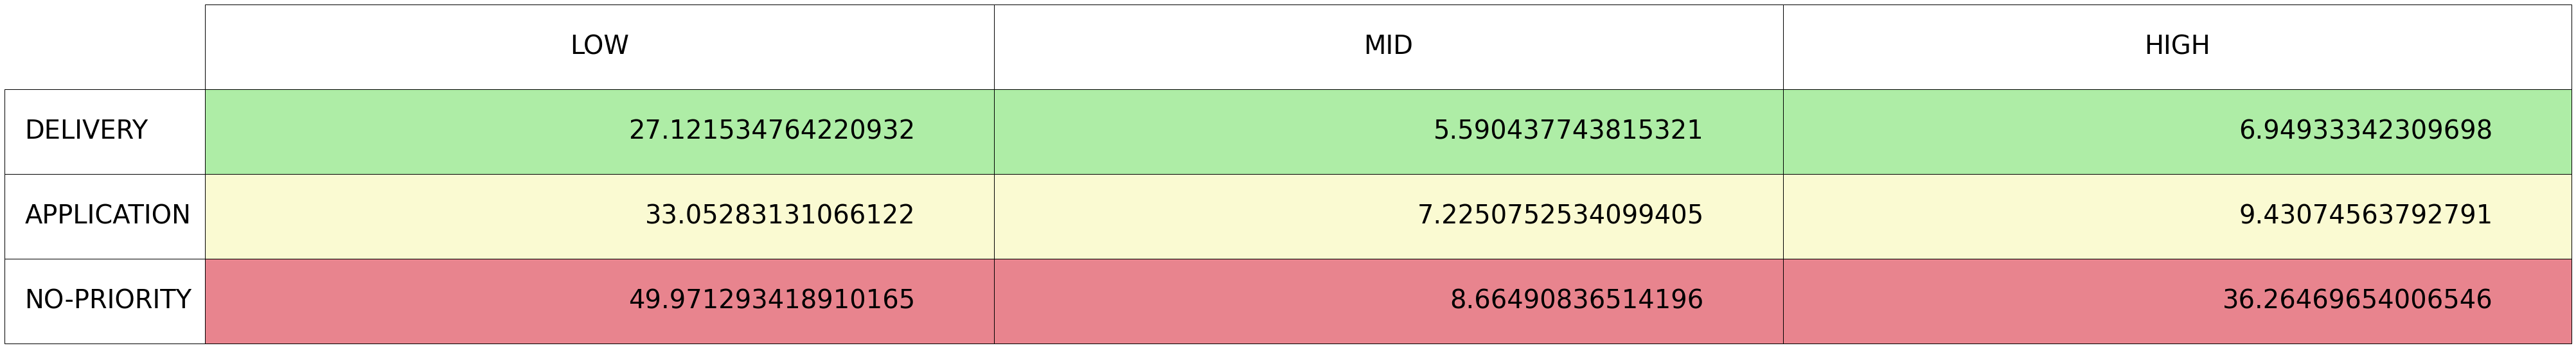

In [24]:
data = [
     meanPrior_dv,
     meanPrior_app,
     meanNoPrior
]


color=[["#aeeda6","#aeeda6","#aeeda6"],
       ["#FAFAD2","#FAFAD2","#FAFAD2"],
       ["#e8848e","#e8848e","#e8848e"]]

header=["LOW","MID","HIGH"]
labels=["DELIVERY", "APPLICATION","NO-PRIORITY"]
fig, ax = plt.subplots()
    
# Creazione della tabella
table = ax.table(cellText=data, cellColours=color,colLabels=header,rowLabels=labels, loc='center')

# Personalizzazione della tabella
table.auto_set_font_size(False)
table.set_fontsize(40)
table.scale(11, 11)

# Nascondi gli assi
ax.axis('off')


# Visualizza la figura
plt.show()